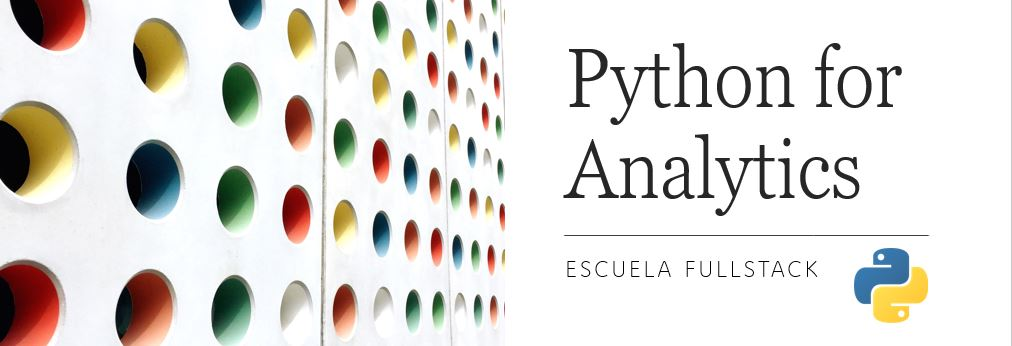

## **Sección 4**
### **Análisis Descriptivo de Datos**

En esta sección cubriremos los conceptos:
- Histogramas y gráficas de barras
- Gráficas de líneas
- Gráficas de dispersión
- Diagrama de cajas
- Mapas calor
- Otros gráficos útiles (matriz de correlación, matriz de dispersión)
- Caso aplicativo: Preparar los gráficos del caso y definir hipótesis

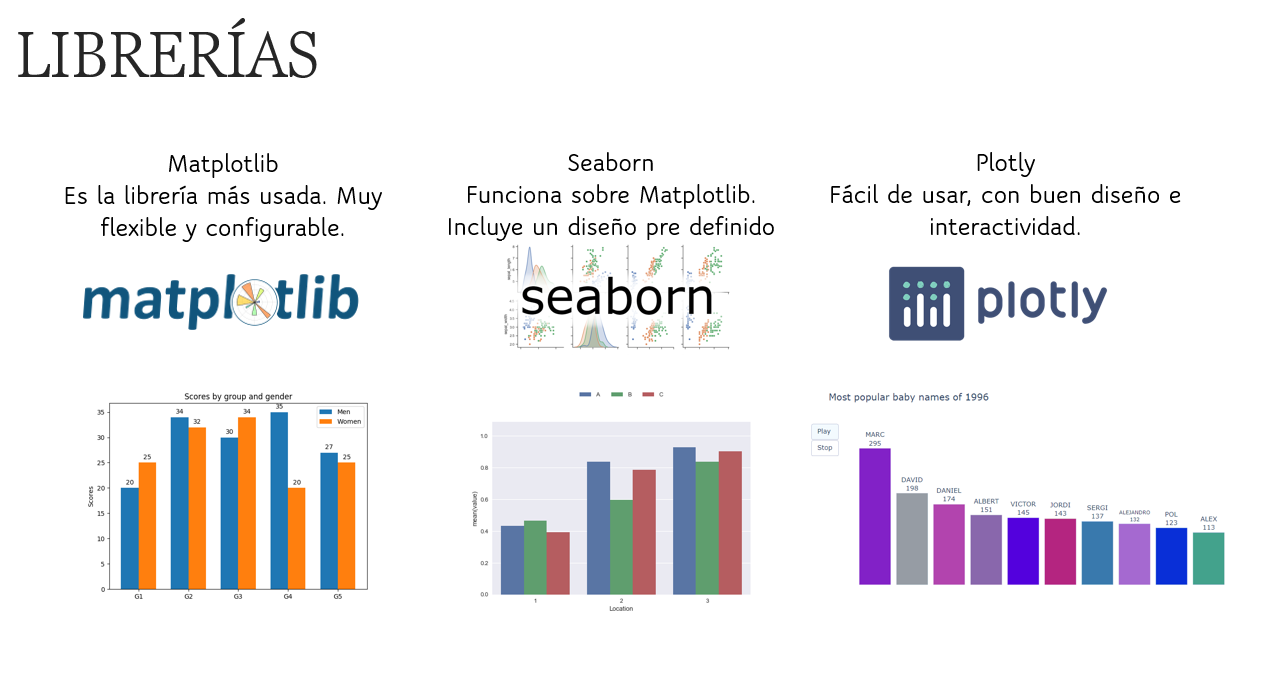

In [ ]:
#Importamos las librerías de visualización

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


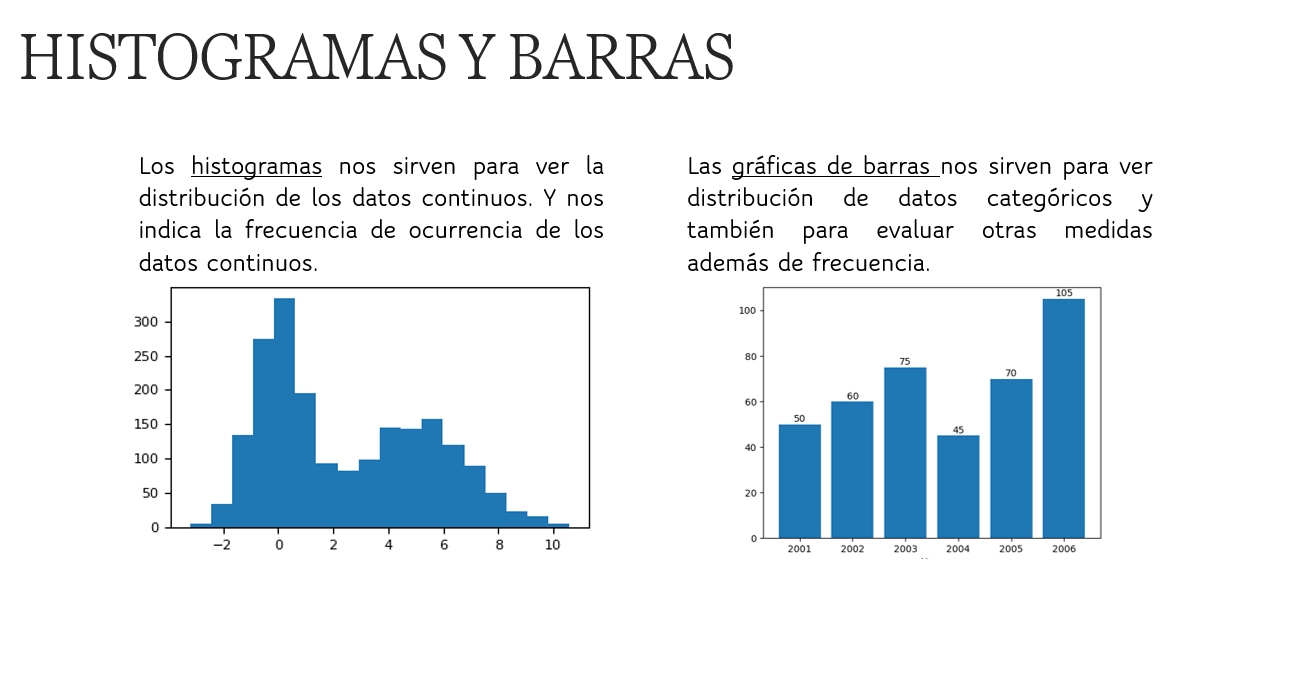

In [ ]:
#Creando un histograma en matplotlib

x = [1,1,2,3,3,5,7,8,9,10,
     10,11,11,13,13,15,16,17,18,18,
     18,19,20,21,21,23,24,24,25,25,
     25,25,26,26,26,27,27,27,27,27,
     29,30,30,31,33,34,34,34,35,36,
     36,37,37,38,38,39,40,41,41,42,
     43,44,45,45,46,47,48,48,49,50,
     51,52,53,54,55,55,56,57,58,60,
     61,63,64,65,66,68,70,71,72,74,
     75,77,81,83,84,87,89,90,90,91
     ]

plt.hist(x, bins=10)
plt.show()

In [ ]:
#Creando un histograma y definiendo los bins

plt.hist(x, bins=[0,10,20,30,40,50,60,70,80,90,99])
plt.show()

In [ ]:
#Creando un histograma y curva de distribución con seaborn

sns.distplot(x)
plt.show()

In [ ]:
#Cargando data de Disneyland Paris para seguir practicando

import pandas as pd
from google.colab import files

#cargar = files.upload()

df = pd.read_csv("/content/facebook_reviews_disneylandParis_format.csv",sep=",")
df.head()

In [ ]:
#Repitiendo la edición del Dataframe que ya revisamos

df.columns = ["ID Usuario","Review","Rating","Fecha","Hora completa","Hora","Dia Semana","Formato Review","Idioma","Mes","Tamano","Palabras"]

dia_semana = {'Origen':["Lun","Mar","Mer","Jeu","Ven","Sam","Dim"], 'Dia_Semana':["Lun","Mar","Mie","Jue","Vie","Sab","Dom"]} 
dia_semana = pd.DataFrame(dia_semana)

df1 = df.merge(dia_semana, left_on="Dia Semana", right_on="Origen", how = "left")
df1.head()

In [ ]:
#Creando un histograma para ver la distribución de los ratings

print(df1["Rating"].mean())

plt.hist(df1["Rating"])
plt.show()

In [ ]:
#Creando un histograma para ver la distribución de las horas

sns.distplot(df1["Hora"])
plt.show()

In [ ]:
#Creando un gráfico de barras para ver los ratings por día de la semana

df2 = df1.groupby(["Dia_Semana"])["Rating"].count().reset_index()
ax = sns.barplot(x="Dia_Semana", y="Rating", data=df2, palette="Blues_d")


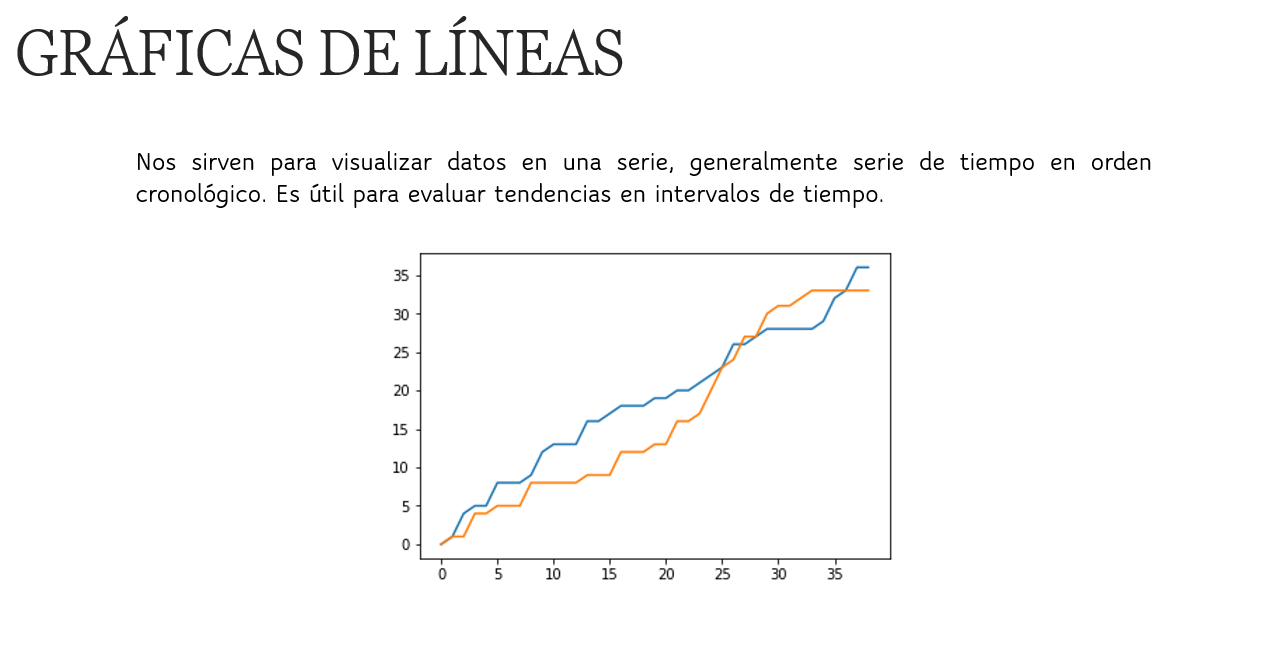

In [ ]:
#Creando un gráfico para evaluar el promedio de ratings en el tiempo

#Primero convertimos nuestra variable de tiempo a tipo fecha
df1["Mes"] = pd.to_datetime(df1["Mes"])

#Preparamos el dataset al formato correcto
df2 = df1.groupby(["Mes"])["Rating"].mean().reset_index()

#Visualizamos
plt.plot(df2["Mes"],df2["Rating"])
plt.title("Ratings por mes")
plt.xlabel("Mes")
plt.ylabel("Promedio de ratings")
plt.show()

In [ ]:
#Graficando con seaborn

ax = sns.lineplot(x="Mes", y="Rating", data=df2)


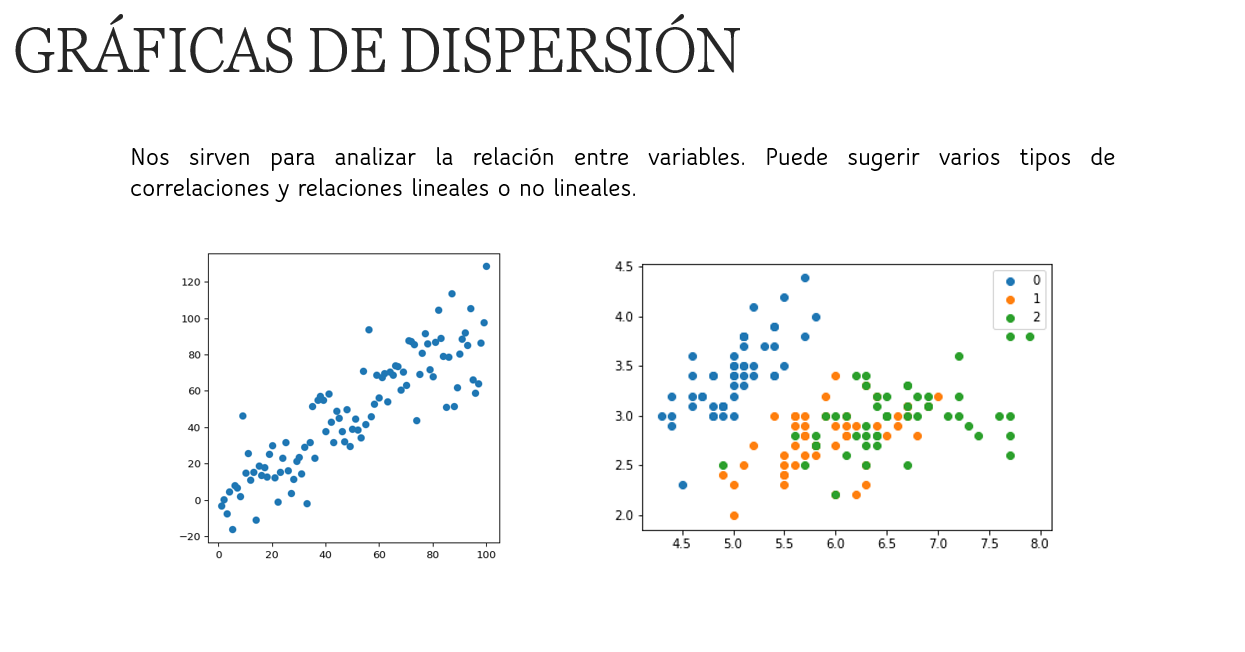

In [ ]:
#Visualizando un gráfico de dispersión scatter en matplotlib

#Preparamos el dataset al formato correcto
df3 = df1.groupby(["Hora"])["Rating"].mean().reset_index()

plt.scatter(df3["Hora"], df3["Rating"], marker='x')
plt.show()

In [ ]:
#Visualizando un gráfico de dispersión scatter en matplotlib

#Preparamos el dataset al formato correcto
df3 = df1.groupby(["Hora"])["Palabras"].mean().reset_index()

plt.scatter(df3["Hora"], df3["Palabras"], marker='o')
plt.show()

In [ ]:
#Visualizando un gráfico de dispersión scatter en seaborn

#Preparamos el dataset al formato correcto
df3 = df1.groupby(["Hora","Dia_Semana"])["Palabras"].mean().reset_index()

sns.relplot(x="Hora", y="Palabras", hue="Dia_Semana", data=df3)
plt.title("Promedio Palabras en el Review según Hora y Día de la Semana")
plt.show()

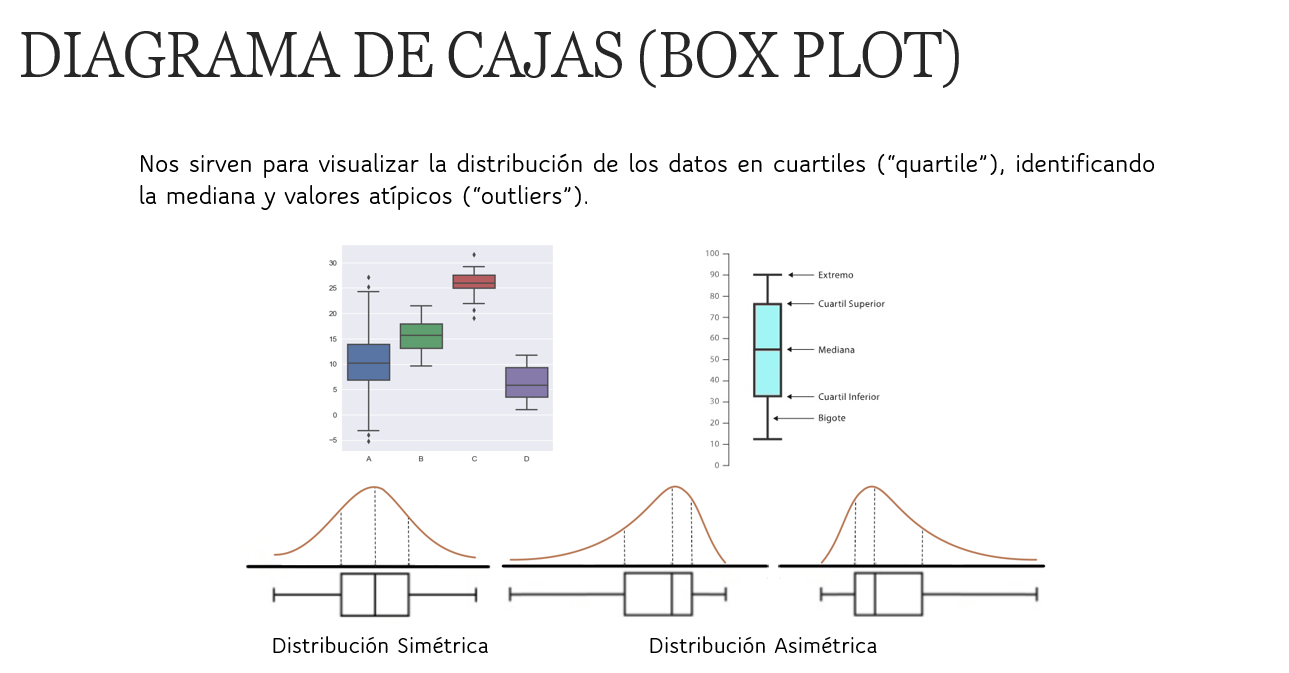

In [ ]:
#Visualizando un diagrama de cajas con seaborn

#Preparamos el dataset al formato correcto
df3 = df1.groupby(["Hora","Dia_Semana"])["Rating"].mean().reset_index()

sns.boxplot(x=df3["Hora"], y=df3["Rating"])
plt.show()

In [ ]:
#Cambiando de medida a visualizar

sns.boxplot(x=df3["Dia_Semana"], y=df3["Rating"])
plt.show()

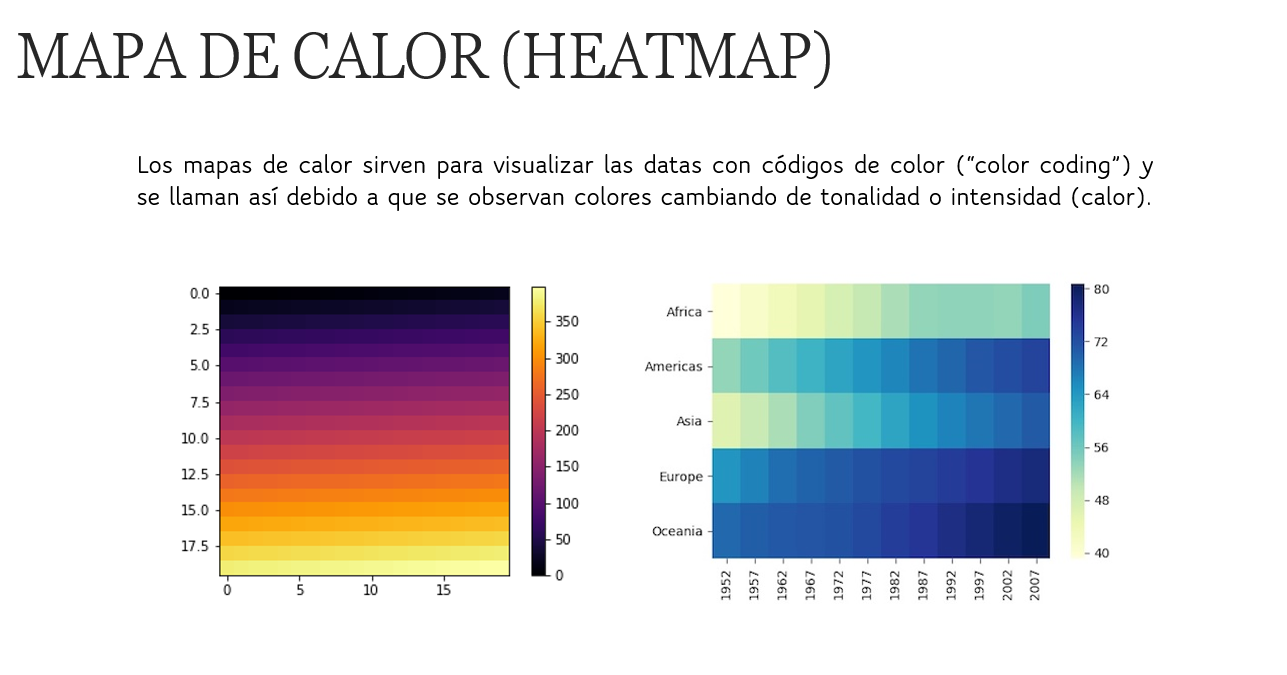

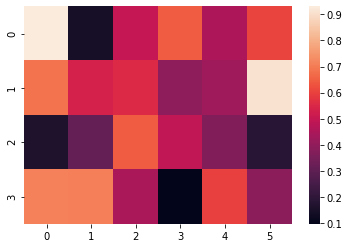

In [95]:
#Visualizando un mapa de calor con seaborn
import numpy as np

data = np.random.rand(4, 6)

sns.heatmap(data)
plt.show()

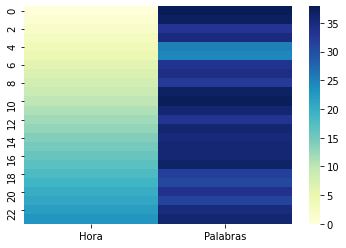

In [96]:
#Visualizando un mapa de calor del promedio de palabras por hora (excluyendo datos vacíos)

#Preparamos el dataset al formato correcto
df4 = df1.dropna(axis=0).groupby(["Hora"])["Palabras"].mean().reset_index()

sns.heatmap(df4, cmap="YlGnBu")
plt.show()

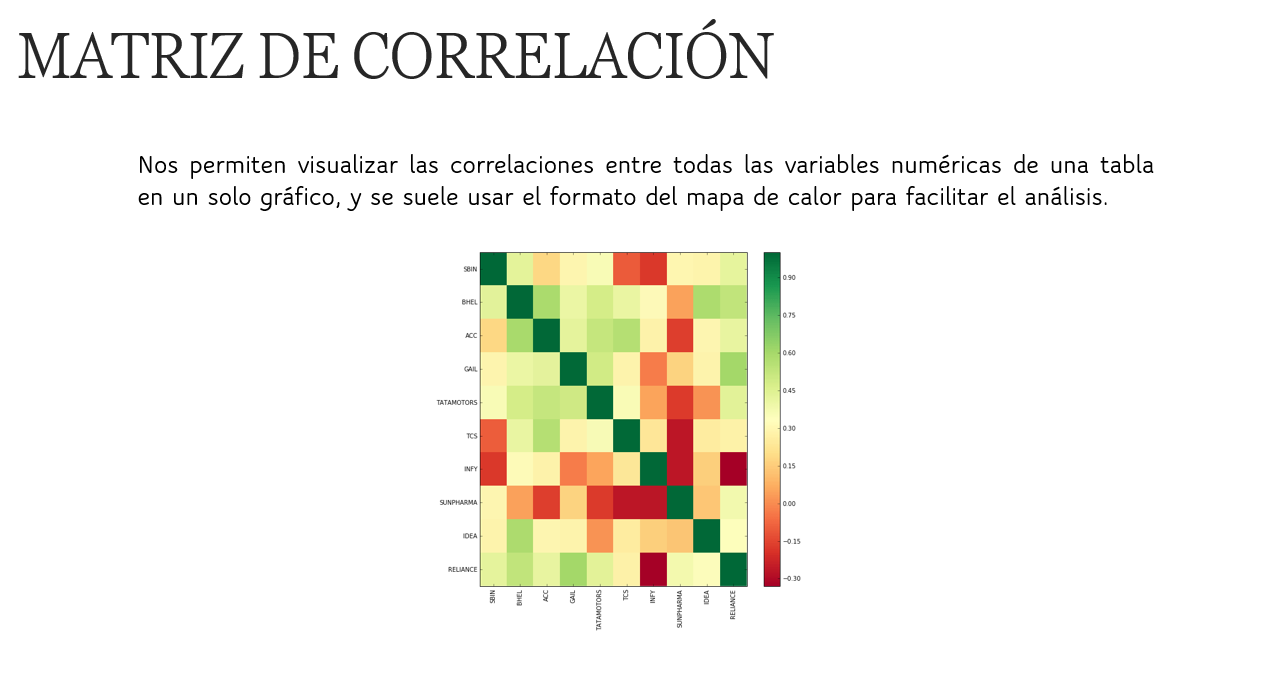

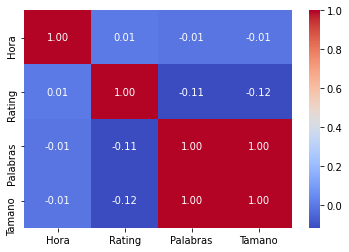

In [97]:
#Visualizando un mapa de calor de correlación (o matriz de correlación)

sns.heatmap(df1[["Hora","Rating","Palabras","Tamano"]].corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.show()


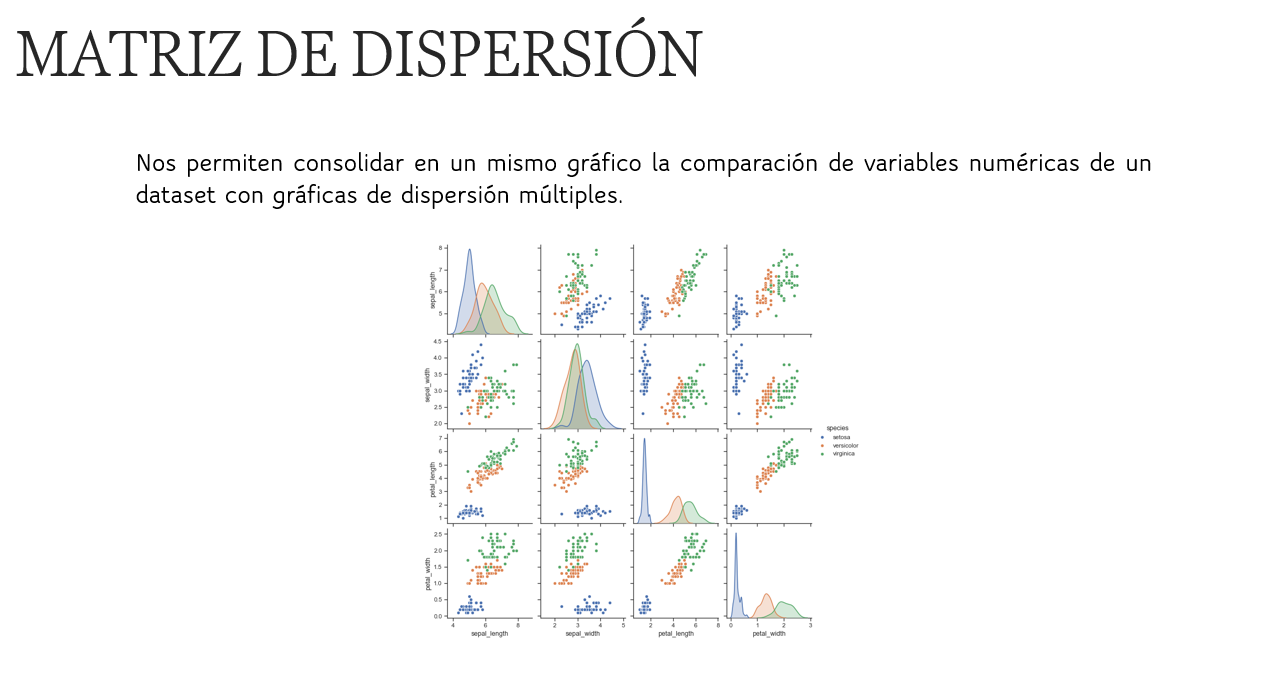

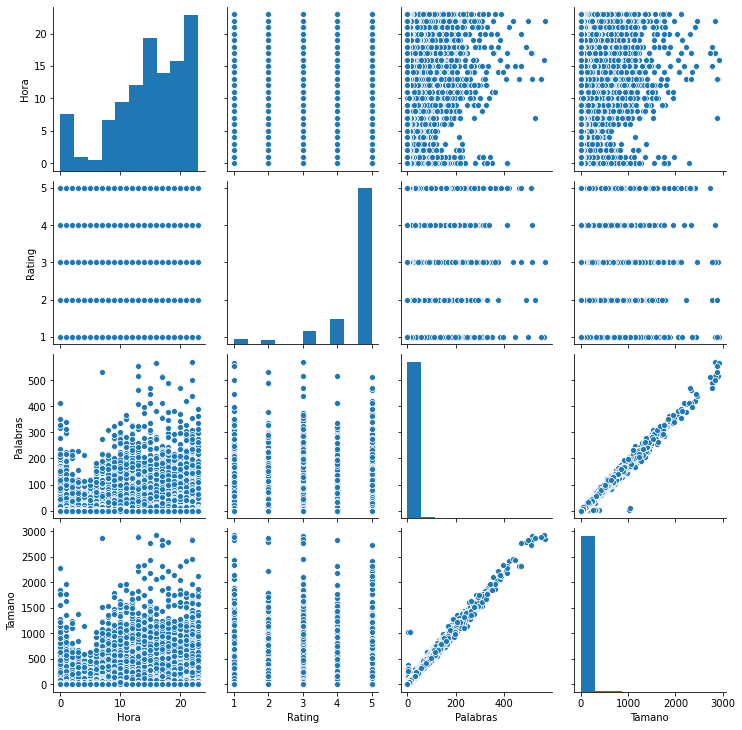

In [98]:
#Visualizando una matriz de dispersión con seaborn

sns.pairplot(df1[["Hora","Rating","Palabras","Tamano"]])
plt.show()